In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [2]:
def energia(matriz): #los elementos de la matriz pueden valer 1 o -1
    FILS = matriz.shape[0]
    COLS = matriz.shape[1]
    energia = 0
    for i in range(FILS):
        for j in range(COLS):
            estoy = matriz[i,j]
            if i > 0:
                energia += estoy*matriz[i-1,j]
            if j>0:
                energia += estoy*matriz[i,j-1]
            if i < FILS-1:
                energia += estoy*matriz[i+1,j]
            if j < COLS-1:
                energia += estoy*matriz[i,j+1]
    return energia*(-0.5)

In [3]:
np.random.seed(1)
choices = [-1,1]
matriz = np.random.choice(choices, (10,10))
print((energia(matriz)))

-14.0


In [5]:
def simulacion_proceso_boltzmann(matriz_inicial, k, T):
    FILS = matriz_inicial.shape[0]
    COLS = matriz_inicial.shape[1]
    for i in tqdm.tqdm(range(1000)):
        energia_inicial = energia(matriz_inicial)
        #vamos a cambiar un dipolo aleatoriamente
        i = np.random.randint(FILS)
        j = np.random.randint(COLS)
        matriz2 = matriz_inicial.copy()
        matriz2[i][j] *= -1
        # print(matriz2)
        energia2 = energia(matriz2)
        delta_energia = energia2 - energia_inicial
        if energia2 > energia_inicial:
            p = np.exp(-delta_energia/(k*T))
            if p > np.random.rand():
                matriz_inicial = matriz2
        else:
            matriz_inicial = matriz2
    return matriz_inicial

matriz_proc_boltz = simulacion_proceso_boltzmann(matriz,1,100)
print(matriz_proc_boltz)
print(energia(matriz_proc_boltz))

100%|██████████| 1000/1000 [00:00<00:00, 4370.84it/s]

[[ 1  1 -1 -1  1  1  1  1 -1  1]
 [ 1  1 -1 -1 -1  1 -1 -1 -1  1]
 [-1 -1  1  1  1  1  1 -1  1  1]
 [ 1  1  1  1  1  1  1 -1  1 -1]
 [-1 -1  1 -1 -1 -1 -1 -1 -1  1]
 [ 1 -1 -1  1  1  1 -1 -1 -1  1]
 [ 1 -1  1  1  1  1 -1  1  1  1]
 [ 1  1  1  1  1 -1 -1 -1 -1  1]
 [ 1  1  1 -1  1 -1  1  1 -1  1]
 [-1 -1  1 -1 -1  1  1  1  1 -1]]
-22.0


  0%|          | 0/100000 [00:00<?, ?it/s]/var/folders/j2/_4b8zzy5031_q5wjdv19vlhc0000gp/T/ipykernel_85336/3329142823.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  vector_magnets.append(magnetizacion_acumulada/i)
100%|██████████| 100000/100000 [00:10<00:00, 9215.32it/s]


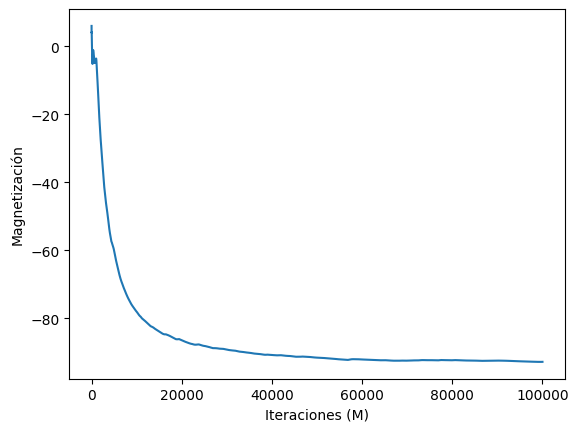

In [57]:
def simulacion_magnetizacion(mat, k ,T, M):
    FILS = mat.shape[0]
    COLS = mat.shape[1]
    magnetizacion_acumulada = 0
    vector_magnets = []
    for i in tqdm.tqdm(range(M)):
        magnetizacion1 = np.sum(mat)
        magnetizacion_acumulada += magnetizacion1
        vector_magnets.append(magnetizacion_acumulada/i)
        energia_inicial = energia(mat)
        #vamos a cambiar un dipolo aleatoriamente
        i = np.random.randint(FILS)
        j = np.random.randint(COLS)
        matriz2 = mat.copy()
        matriz2[i][j] *= -1
        # print(matriz2)
        energia2 = energia(matriz2)
        delta_energia = energia2 - energia_inicial
        if energia2 > energia_inicial:
            p = np.exp(-delta_energia/(k*T))
            if p > np.random.rand():
                mat = matriz2
        else:
            mat = matriz2
    return vector_magnets

vector_magnets = simulacion_magnetizacion(matriz,1,4,100000)
plt.plot(vector_magnets)
plt.xlabel("Iteraciones (M)")
plt.ylabel("Magnetización")
plt.show()